<font size='4'>**Problem statement:** Cluster the observations of College dataset into 'private' and 'public' using K-Means algorithm. Supposing that labels are NOT given, employ K-Means and find an optimal cluster size. Comment on cluster evaluation technique.<font>

In [28]:
# Importing required libraries.
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,silhouette_samples, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [1]:
# Commenting warning removing stuff to check for a warning in future opearation on DF. 
# Ignoring warnings.
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Assets/College.csv')
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [7]:
df.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#### Creating a scatterplot of grad_rate versus room_board where the points are colored by the private column. 

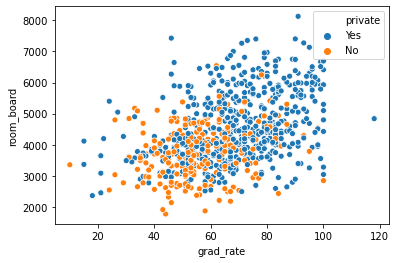

In [8]:
sns.scatterplot(x = 'grad_rate', y='room_board', data=df, hue = 'private')

#### Creating a scatterplot of f_undergrad versus outstate where the points are colored by the private column.

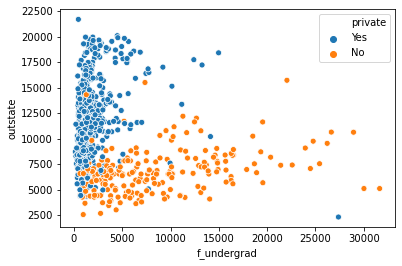

In [9]:
sns.scatterplot(x = 'f_undergrad', y='outstate', data=df, hue = 'private')

#### Creating a stacked histogram showing Out of State Tuition based on the private column.

C:\Users\manoh\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


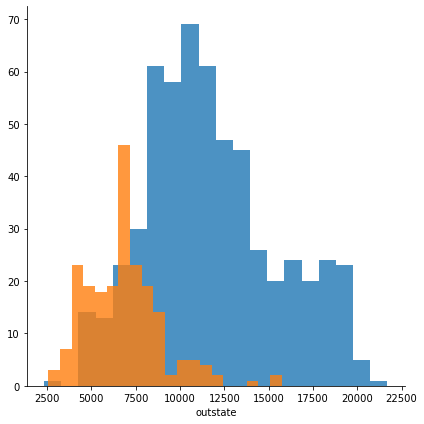

In [10]:
g = sns.FacetGrid(df, hue = 'private', size = 6 )
g = g.map(plt.hist, 'outstate', bins = 20, alpha = 0.8)

#### Creating a similar histogram for the grad rate column. 

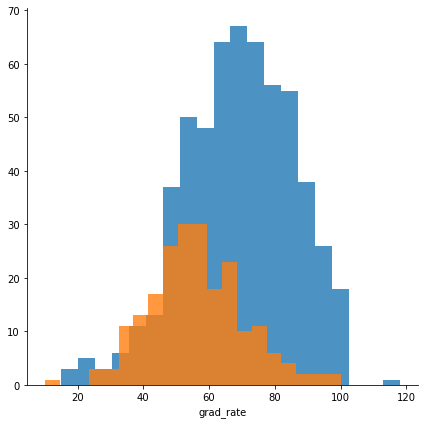

In [11]:
g = sns.FacetGrid(df, hue = 'private', size = 6 )
g = g.map(plt.hist, 'grad_rate', bins = 20, alpha = 0.8)

#### There seems to be a private school with a graduation rate higher than 100%.  

In [3]:
df[df['grad_rate'] > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


#### Note: Set that particular school's graduation rate to 100 so that it can make sense. You may get a warning not an error while doing this operation. Use dataframe operations or just re-do the histogram visualization to make sure it actually changed. 

In [4]:
df['grad_rate'][95] = 100

<ipython-input-4-9c9ea5dd2122>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grad_rate'][95] = 100


In [5]:
df[df['grad_rate'] > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate


C:\Users\manoh\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


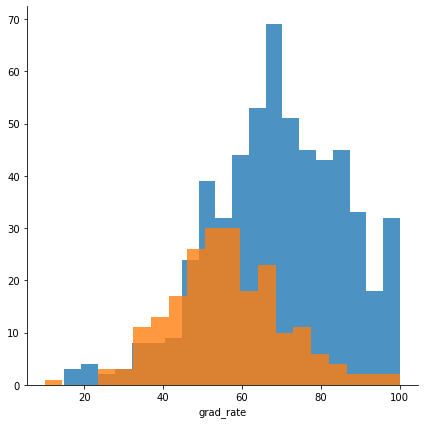

In [14]:
g = sns.FacetGrid(df, hue = 'private', size = 6 )
g = g.map(plt.hist, 'grad_rate', bins = 20, alpha = 0.8)

In [6]:
# As mentioned in the beginning note, column: private is the label here. It should be deleted as clustering is an unsupervised technique.
df1=df.drop('private', axis = 1)

In [18]:
df1

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


#### Note: Clustering invariably requires scaling because of different units.

In [7]:
ss=StandardScaler()

In [8]:
ss.fit(df1)

StandardScaler()

In [9]:
norm_df=ss.transform(df1)

In [24]:
norm_df

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.17992933e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51804628e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.68710475e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.60975094e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.96167109e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.96167109e+00]])

###  Problem 1: k=2, i.e. private Vs. public

In [19]:
kmeans = KMeans(2)

In [31]:
kmeans.fit(norm_df)

KMeans(n_clusters=2)

In [32]:
kmeans.cluster_centers_

array([[-0.31319595, -0.34306342, -0.39375006,  0.07391113,  0.02374758,
        -0.41608333, -0.3091117 ,  0.27191589,  0.14652019, -0.02348479,
        -0.18492119, -0.11054423, -0.10620161, -0.26531492,  0.22911418,
         0.1182772 ,  0.18080535,  0.49358381],
       [ 0.95426891,  1.04527136,  1.19970722, -0.22519796, -0.07235592,
         1.26775388,  0.94182472, -0.82849373, -0.44642869,  0.07155523,
         0.56343176,  0.33681445,  0.32358304,  0.80838139, -0.69808226,
        -0.36037584, -0.5508913 , -1.50388817]])

In [33]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Evaluation 1

#### Creating a new column for df called 'cluster', which is a 0 for a private school, and a 1 for a public school. 

In [34]:
df1['cluster'] = df['private'].apply(lambda x: 0 if x == 'Yes' else 1)

In [35]:
df1.head()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,cluster,cluster1
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,0
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,0
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,0
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,0


#### Creating a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels. 

In [36]:
from sklearn.metrics import classification_report
print(classification_report(df1['cluster1'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       565
           1       0.94      0.85      0.90       212

    accuracy                           0.95       777
   macro avg       0.94      0.92      0.93       777
weighted avg       0.95      0.95      0.95       777



#### Note: Accuracy and F1-score of above 95% looks cool.

### Problem 2: k is unknown

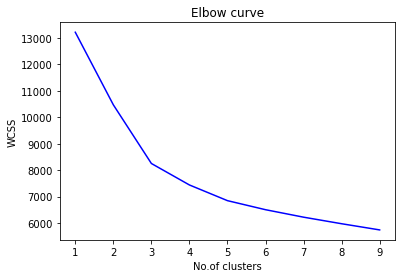

In [12]:
K= range(1,10)
within_cluster_sum_of_squares=[]
for k in K:
    km=KMeans(n_clusters=k)
    km.fit(normalised)
    within_cluster_sum_of_squares.append(km.inertia_)
plt.plot(K,within_cluster_sum_of_squares,'b-')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.title('Elbow curve')
plt.show()

#### Note: Elbow curve is to find the optimal value of k (number of clusters). Here we should select minimum number of cluster with minimum Within Cluster Sum of Squares(WCSS). By doing the trade_off, 5  seems to be suitable. 

In [15]:
kmeans5=KMeans(5)

In [16]:
kmeans5.fit(norm_df)

KMeans(n_clusters=5)

In [18]:
kmeans5.cluster_centers_

array([[-0.51887755, -0.509675  , -0.49735423, -0.63212536, -0.72851934,
        -0.48006581, -0.2679035 , -0.53048237, -0.51845586, -0.09865054,
         0.01145976, -0.94382328, -0.96859685,  0.12225826, -0.37230448,
        -0.4764468 , -0.49768155],
       [ 0.46365148,  0.09529123, -0.0311731 ,  1.92233208,  1.56725394,
        -0.16345773, -0.4400116 ,  1.80468249,  1.19841125,  0.30359401,
        -0.48398918,  1.14811336,  1.09785159, -1.21712489,  1.38281465,
         2.103702  ,  1.16101986],
       [ 2.79150817,  2.93433055,  2.90967114,  0.69487468,  0.82835547,
         2.86368058,  1.4373444 , -0.29448262,  0.18045001,  0.33063953,
         0.49921008,  0.85010331,  0.82135721,  0.39846631, -0.36417216,
         0.21285926,  0.11232008],
       [-0.31273651, -0.27729572, -0.35397533,  0.17873242,  0.27014625,
        -0.38618941, -0.29688654,  0.4900875 ,  0.40965963, -0.09502517,
        -0.33340978,  0.34273321,  0.37209949, -0.25448325,  0.42321488,
         0.06033768

### Evaluation 2

#### Acknowledgement: Below code for Silhouette analysis is copied from  Silhouette analysis for KMeans clustering, a Scikit-Learn's documentation.

In [22]:
range_n_clusters=[2,3,4,5,6]

For n_clusters = 2 The average silhouette_score is : 0.2286626165244013
For n_clusters = 3 The average silhouette_score is : 0.24226492460128102
For n_clusters = 4 The average silhouette_score is : 0.18380010319360665
For n_clusters = 5 The average silhouette_score is : 0.17809345345808236
For n_clusters = 6 The average silhouette_score is : 0.16219371461801066


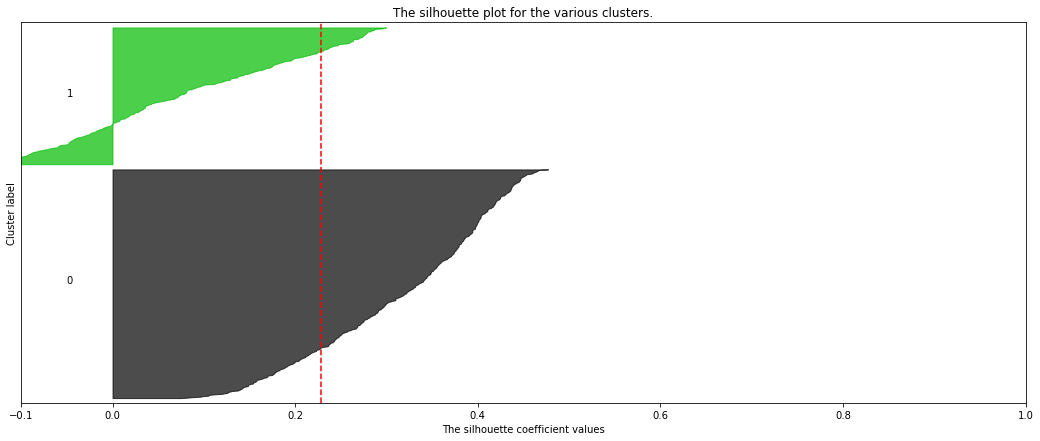

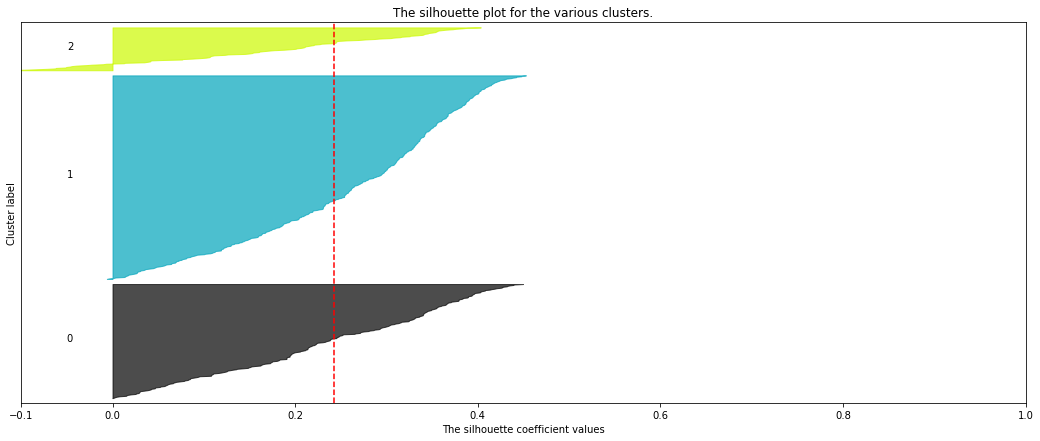

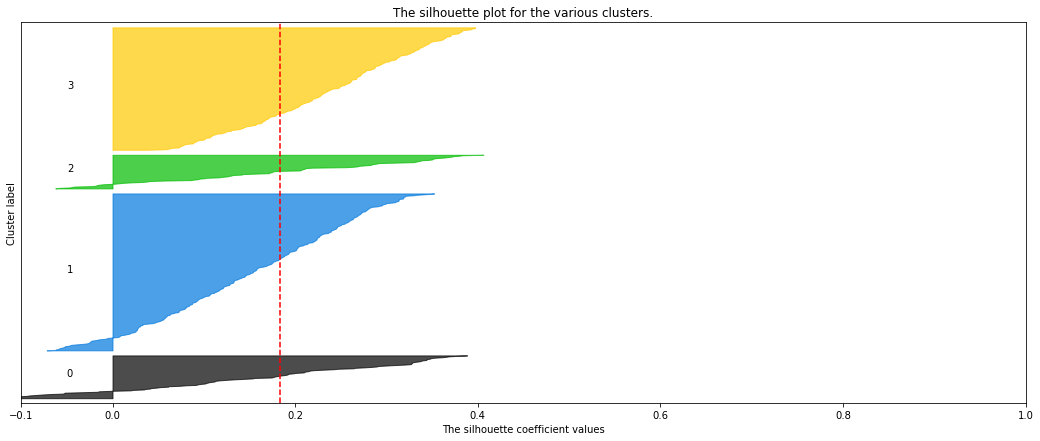

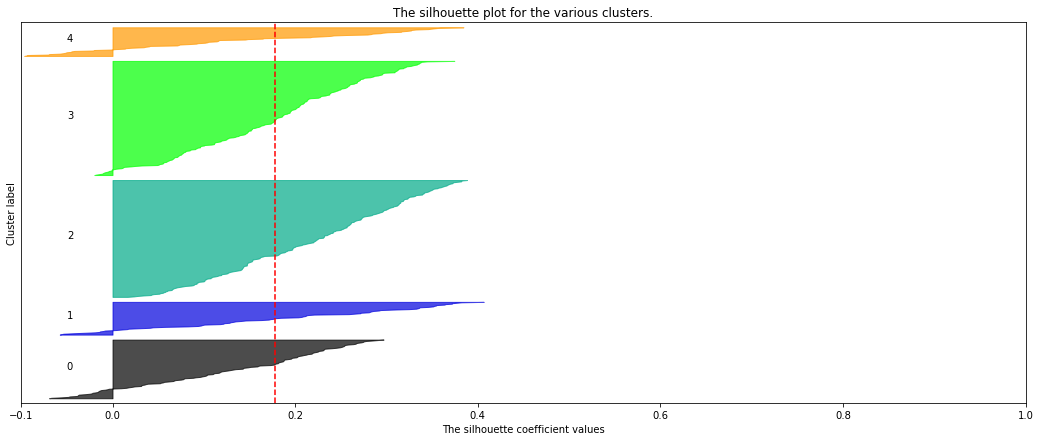

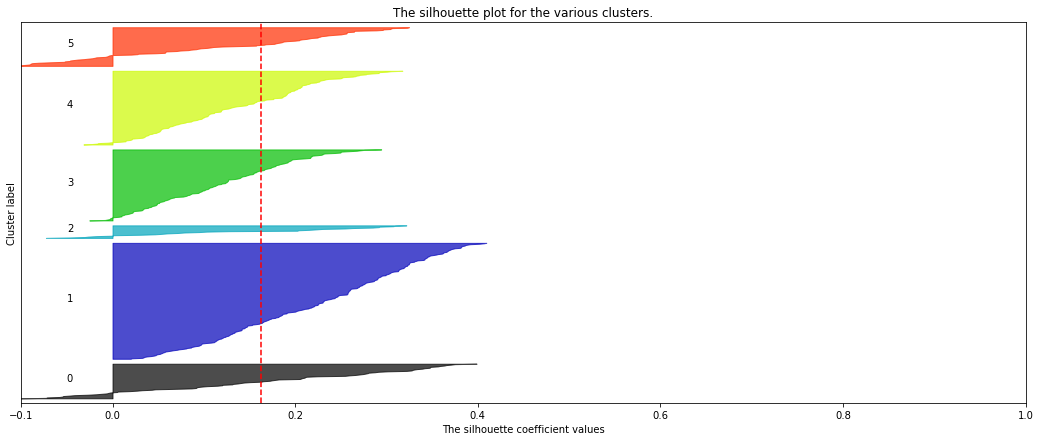

In [30]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(norm_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(norm_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(norm_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(norm_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

#### Note: One can observe that Silhouette score for k=3 is better. However, Silhouette coefficient value is slightly negative for some observations of the 3rd cluster (represented by Yellow-Green). It can be easily overlooked as other competitors are well behind it (k=3) in terms of both yardsticks. 

<br/><br/>

<font size='4'>**Final thoughts:** Some Data scientists follow the methodology of forming a Hierachical cluster to undersatand the k value. At times, analysing pairplots also gives an idea of distribution which consequently stand us in a better position to find the optimal value for k. However, Elbow method is generally preferred. In the similar way, there is no perfect mechanism to evaluate clustering when the labels are unknown. Despite this subjectivity, by and large, Silhouette method is applied</font>. 